## Student Performance Indicator

### Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- EDA
- Data Pre-Processing
- Model Training
- Choose best Model

### Problem Statement

- This project understands how the student's performance (test scores) is affected by the other variables such as parental level of education, Lunch, Test Preparation Course.

---
### Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Shape of dataset:
df.shape

(1000, 8)

---

### Data Checks and Cleaning

In [5]:
# Check Missing Values:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**Observation: There are no missing values in the dataset.**

In [6]:
# Checking for duplicates:
print(df.duplicated().sum())

0


**Observation: There are no duplicate records in the dataset.**

In [7]:
# Checking Data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Checking the number of unique values of each column:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# Checking Statistics of the dataset:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Observation:**
1. From above description of numerical data, all means are very close to each other - between 66 and 68.05.
2. All standard deviations are also close - between 14.6 to 15.19.
3. While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17.

---
### Data Exploration

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Categories in different Features

for feature in df.columns:
    if df[feature].dtype == 'O':
        print(f"Categories in {feature} variable: {df[feature].unique()}\n")
    else:
        pass

Categories in gender variable: ['female' 'male']

Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable: ['standard' 'free/reduced']

Categories in test_preparation_course variable: ['none' 'completed']



In [12]:
# Defining Numerical and Categorical Features:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

# Print Features:
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
# Creating new Features 'total_score' and 'average': total score (writing, reading and math), average (average of maths, writing and reading)
# These both will be the output features. Were we can predict the total marks and average score of the student.

df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [15]:
# Number of students getting full marks:
reading_full = df[df['reading_score']==100]['average_score'].count()
maths_full = df[df['math_score']==100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()

print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Maths: {maths_full}")

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Maths: 7


In [16]:
# Number of students with less that 20 marks:
reading_less_20 = df[df['reading_score']<=20]['average_score'].count()
writing_less_20 = df[df['writing_score']<=20]['average_score'].count()
maths_less_20 = df[df['math_score']<=20]['average_score'].count()

print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Maths: {maths_less_20}")

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Maths: 4


---
### Data Visualization

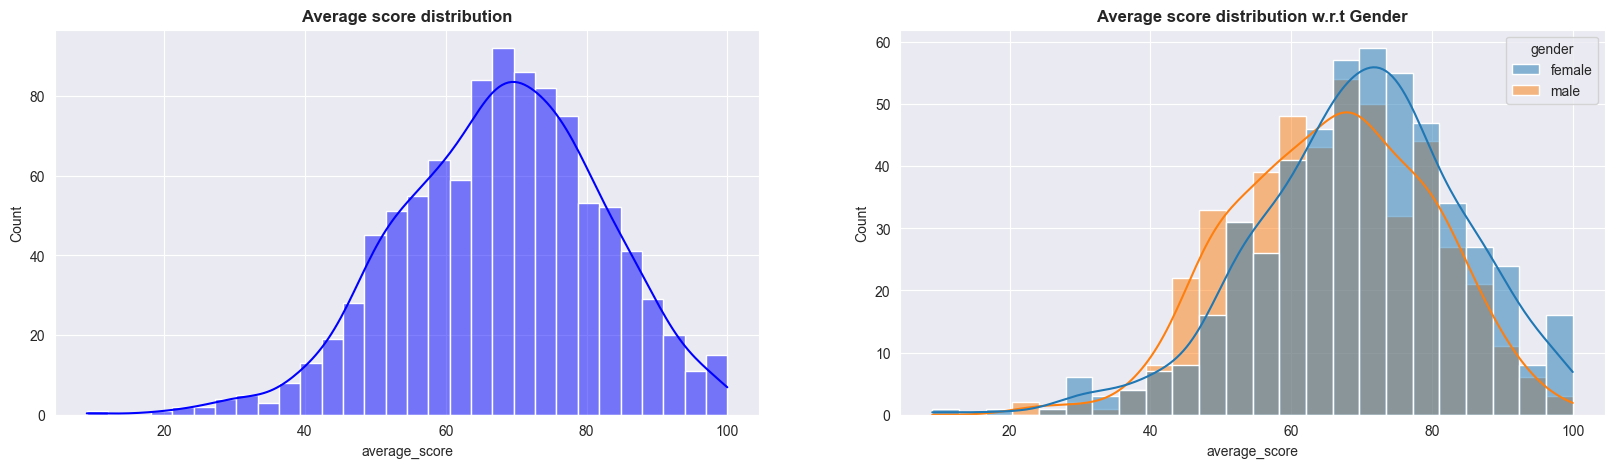

In [17]:
# Visualizing Avergae Score Distribution:

fig, axs = plt.subplots(1,2,figsize=(20,5))
plt.subplot(121)
plt.title("Average score distribution",weight='bold')
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='b')
plt.subplot(122)
plt.title("Average score distribution w.r.t Gender",weight='bold')
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

**Observation:**
- Female students tend to perform better than male students.

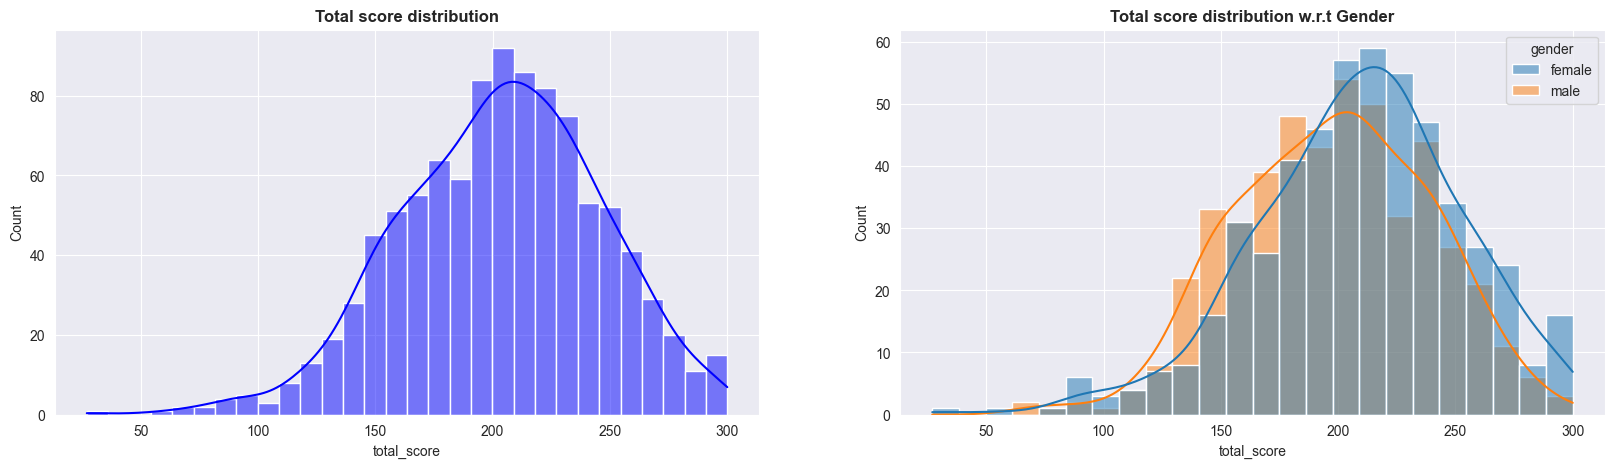

In [18]:
# Visualizing total score distribution:

fig, axs = plt.subplots(1,2,figsize=(20,5))
plt.subplot(121)
plt.title("Total score distribution",weight='bold')
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='b')
plt.subplot(122)
plt.title("Total score distribution w.r.t Gender",weight='bold')
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

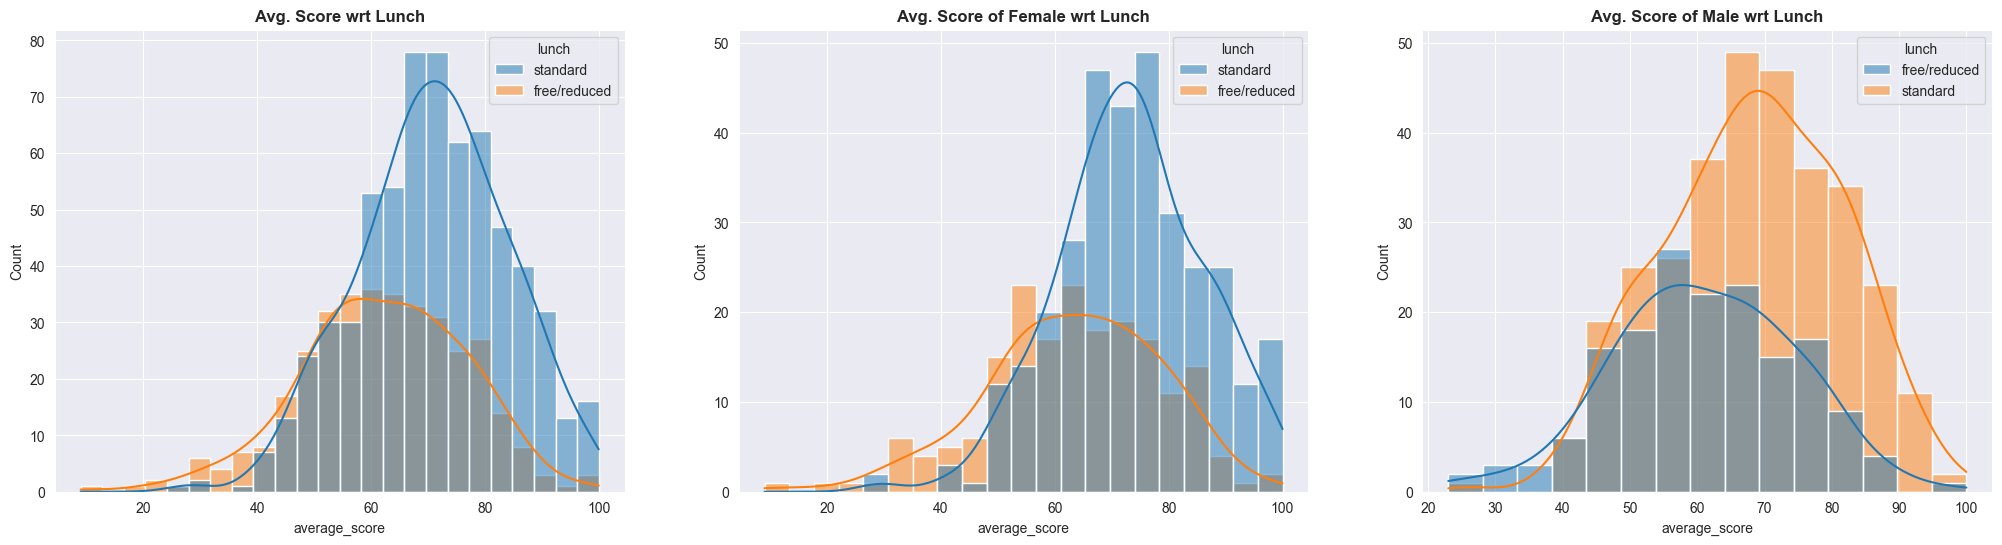

In [19]:
# Visualizing the distribution Avrage score for each gender and lunch:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
plt.title("Avg. Score wrt Lunch",weight='bold')
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
plt.title("Avg. Score of Female wrt Lunch",weight='bold')
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
plt.title("Avg. Score of Male wrt Lunch",weight='bold')
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

**Observation:**
- Standard Lunch helps perform well in exams.
- Standard Lunch helps perform well in exams be it male or female.

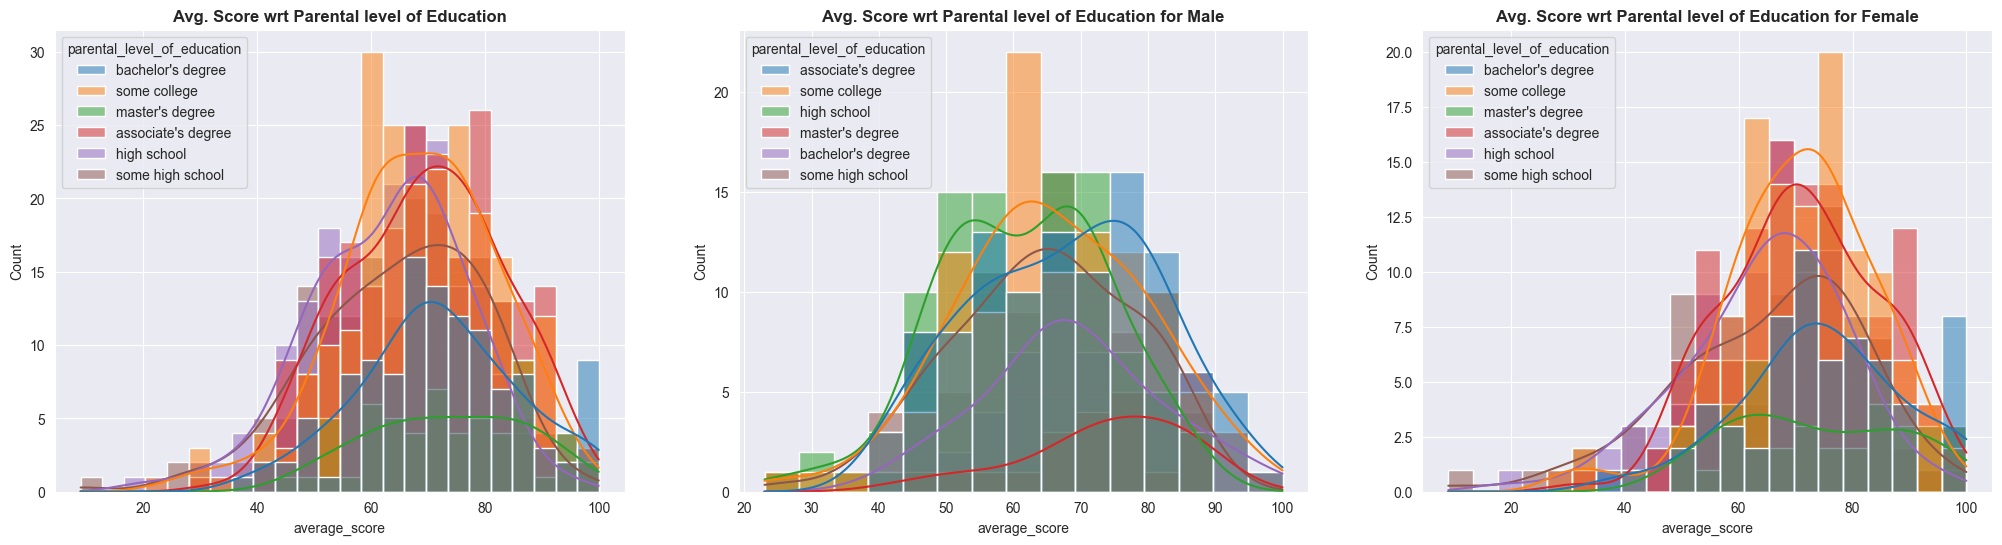

In [20]:
# Visualizing Distribution of Average Score wrt to Parental level of eduction for each gender:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
plt.title("Avg. Score wrt Parental level of Education",weight='bold')
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
plt.title("Avg. Score wrt Parental level of Education for Male",weight='bold')
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
plt.title("Avg. Score wrt Parental level of Education for Female",weight='bold')
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

**Observation:**
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
- 3rd plot we can see there is no effect of parent's education on female students.

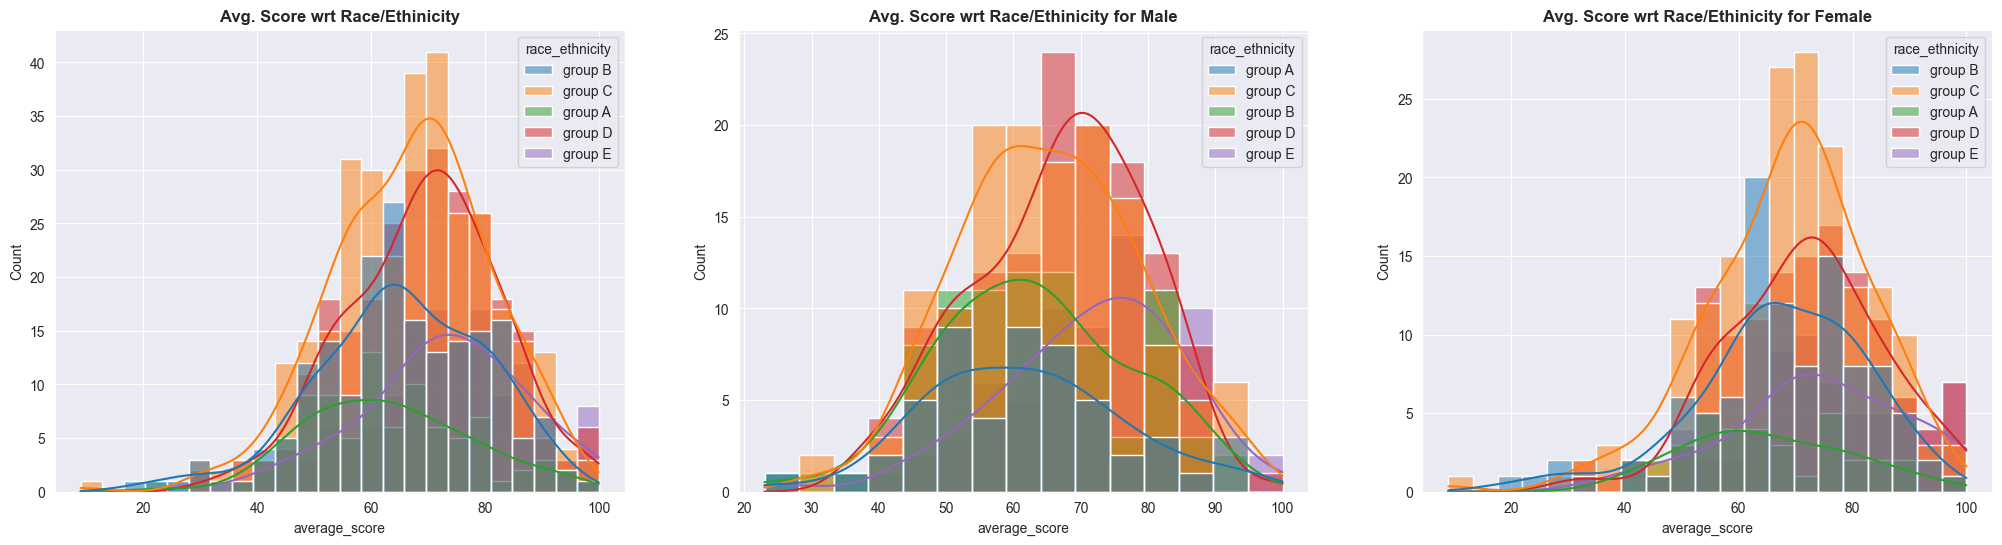

In [21]:
# Visualizing Distribution of Average Score wrt to  Ethnicity Group:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
plt.title("Avg. Score wrt Race/Ethinicity",weight='bold')
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
plt.title("Avg. Score wrt Race/Ethinicity for Male",weight='bold')
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
plt.title("Avg. Score wrt Race/Ethinicity for Female",weight='bold')
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

**Observation:**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of their gender.

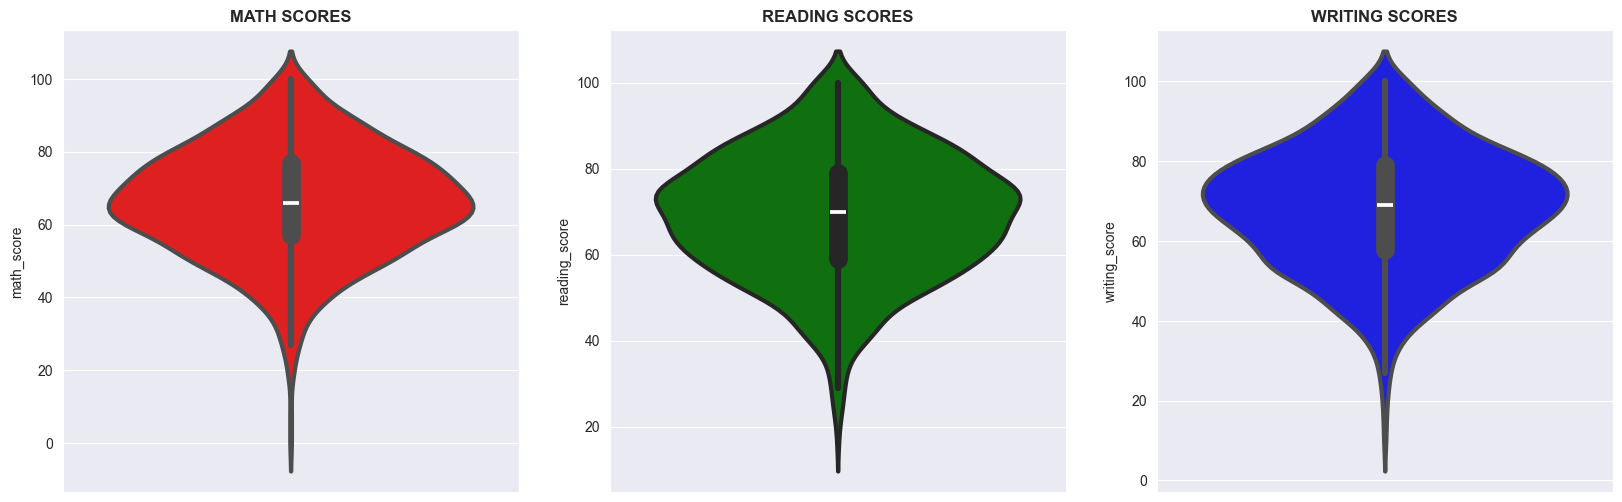

In [22]:
# Maximum Score of Students in All Three Subjects:

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES',weight='bold')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES',weight='bold')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES',weight='bold')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

**Observation:**
- From the above plots it can be observed that most of the students score in between 60-80 in Maths whereas in Reading and Writing most of them score from 50-80.

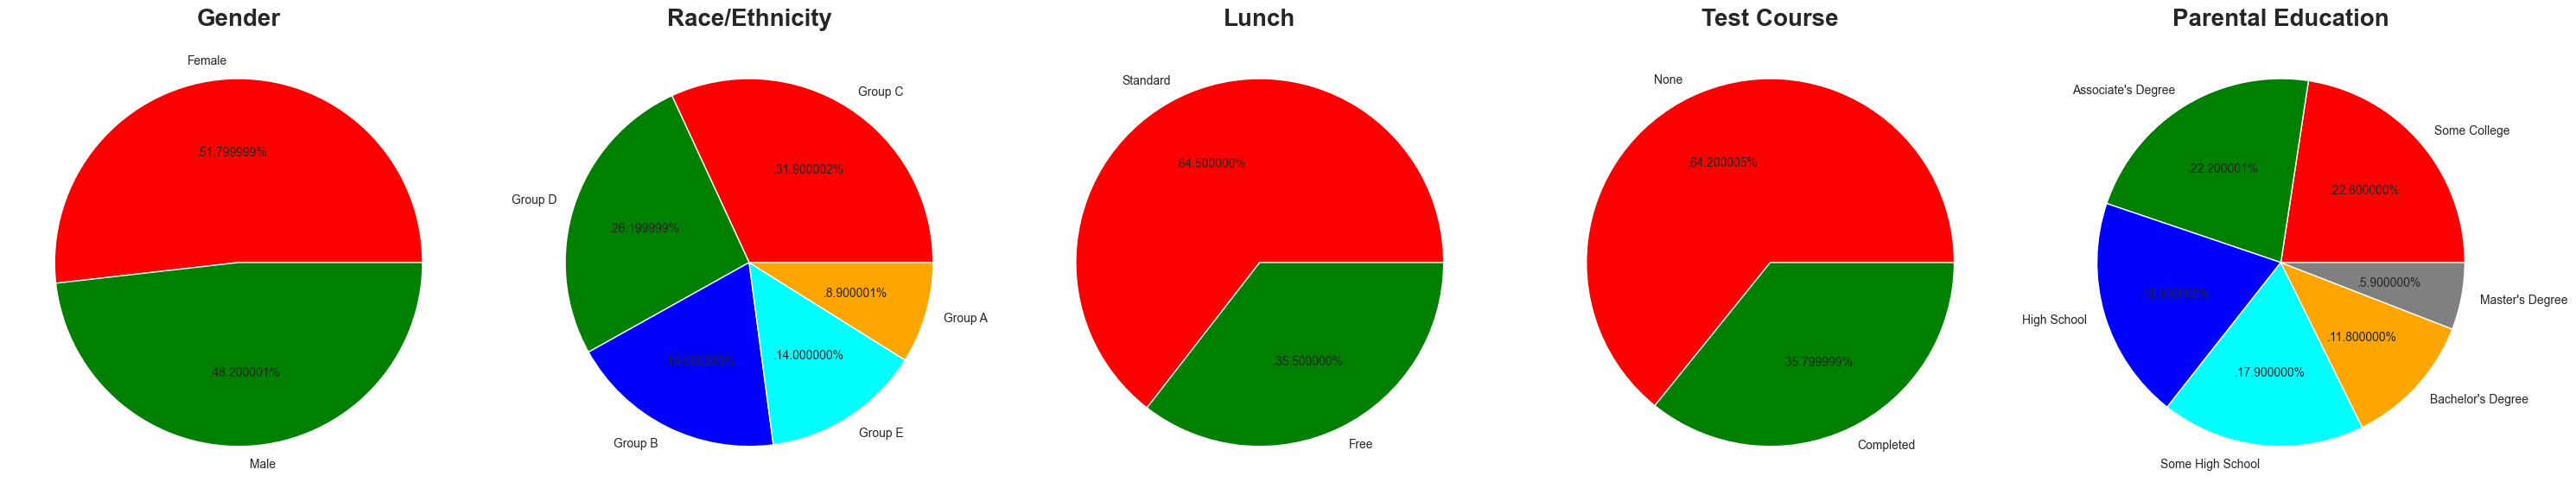

In [23]:
# Multivariate Analysis using Pieplot:

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20,weight='bold')
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20,weight='bold')
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20,weight='bold')
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',)
plt.title('Test Course', fontsize = 20,weight='bold')
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20,weight='bold')
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


**Observation:**
- Number of Male and Female students is almost equal.
- Number of students are greatest in group C.
- Number of students having standard lunch is greater.
- Number of students who have enrolled in Test Course is greater.
- Number of students whose parental education is "Some College" is greater followed by "Associate's Degree".

---
### Feature Wise Visualization


#### 1. Gender Column:
- How is the Distribution of Gender?
- Is gender has any impact on student's performance?

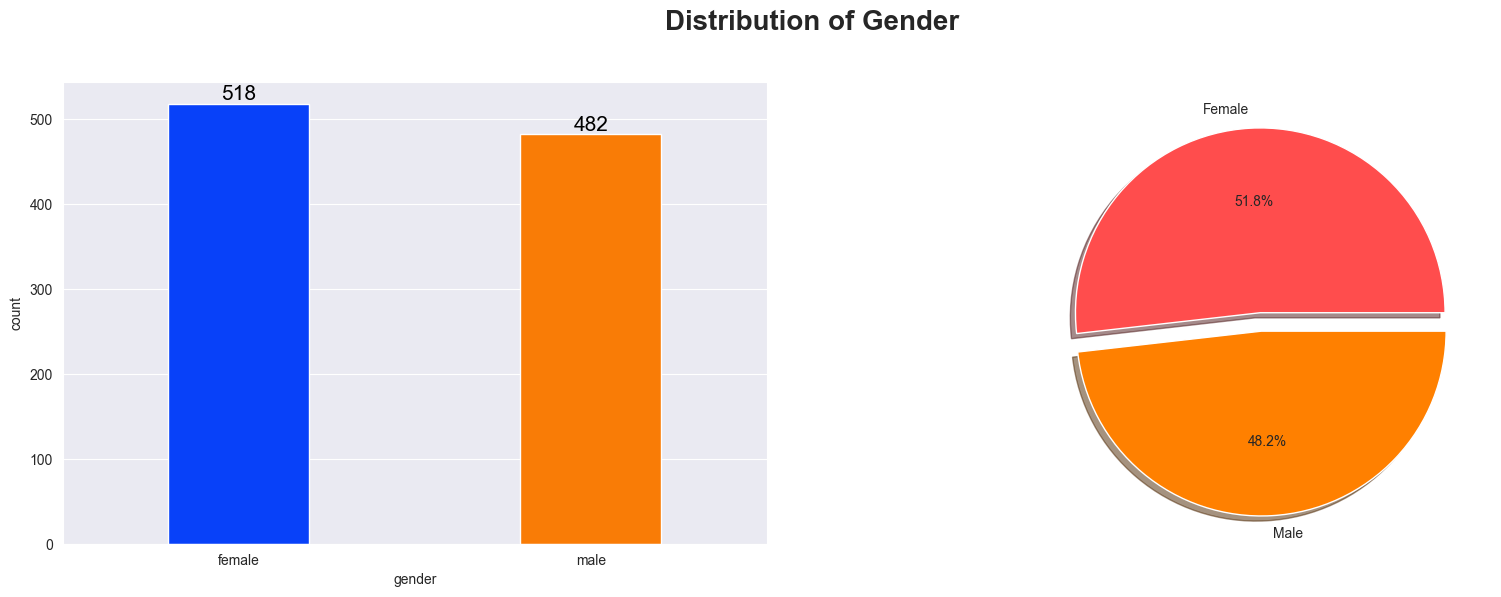

In [24]:
# How is Gender Distributed?

f,ax=plt.subplots(1,2,figsize=(20,6))
plt.suptitle("Distribution of Gender",fontweight='bold',fontsize=20,y=1)
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95,width=0.4)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Observation:**
- Gender has balanced data with female students 518(51.8%) and male students 482 (48.2%). 

In [25]:
# Is Gender has any impact on student's performance?

gender_tot_avg = df.groupby('gender')['total_score'].mean().reset_index()
gender_math = df.groupby('gender')['math_score'].mean().reset_index()

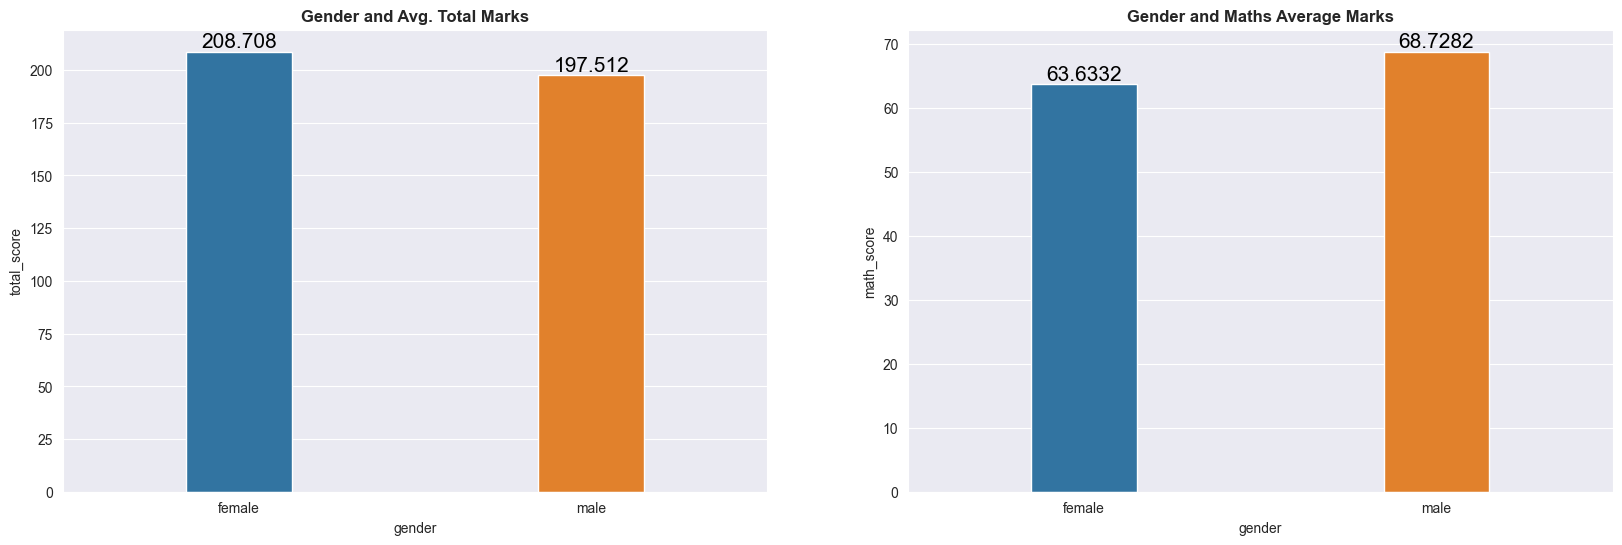

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Gender and Avg. Total Marks",weight='bold')
sns.barplot(data=gender_tot_avg,x='gender',y='total_score',hue='gender',width=0.3,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)


plt.subplot(1,2,2)
plt.title("Gender and Maths Average Marks",weight='bold')
sns.barplot(data=gender_math,x='gender',y='math_score',hue='gender',width=0.3,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


plt.show()

**Observation:**
- On an average Female scores better overall.
- Whereas males on an average men scores better in maths subject.


#### 2. Race/Ethnicity Column:
- How is Group wise Distribution?
- Is race/ethnicity has any impact on student's performance?

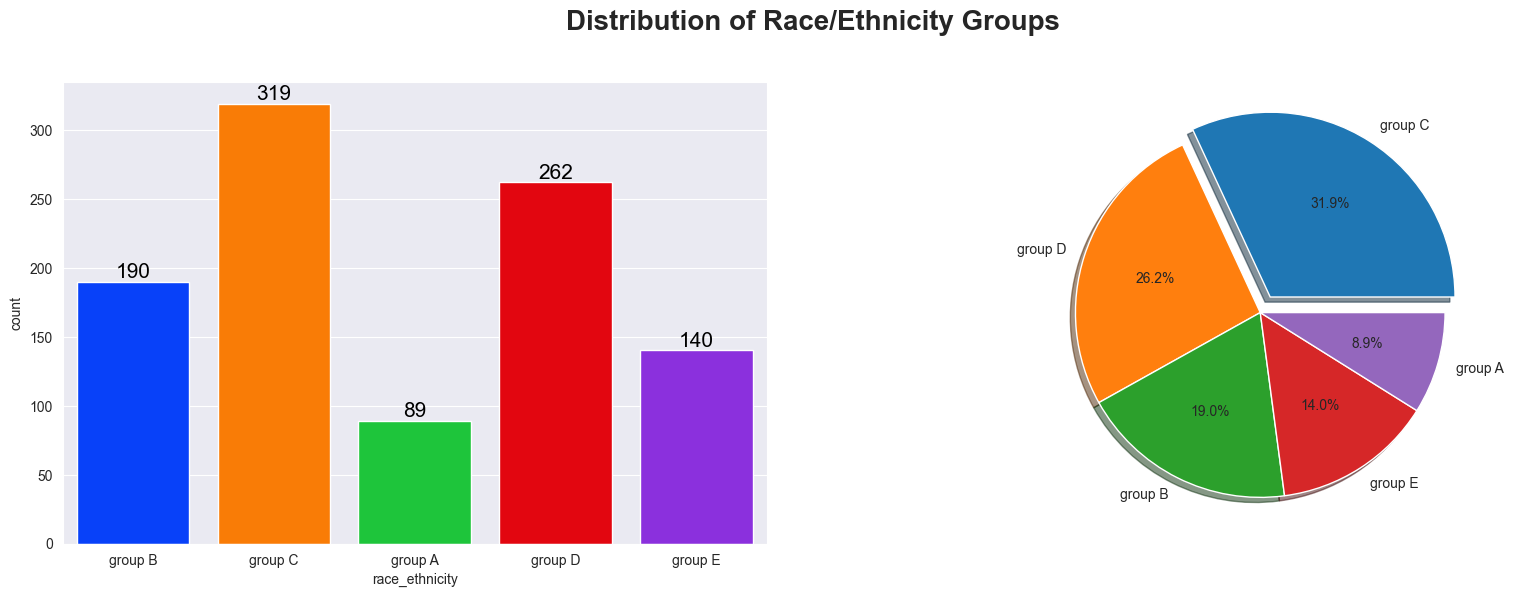

In [27]:
# How is group wise distribution?

f,ax=plt.subplots(1,2,figsize=(20,6))
plt.suptitle("Distribution of Race/Ethnicity Groups",weight='bold',size=20,y=1)
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

**Observation:**
- Most of the students belongs to group C and D.
- Very less number of students belongs to group A.

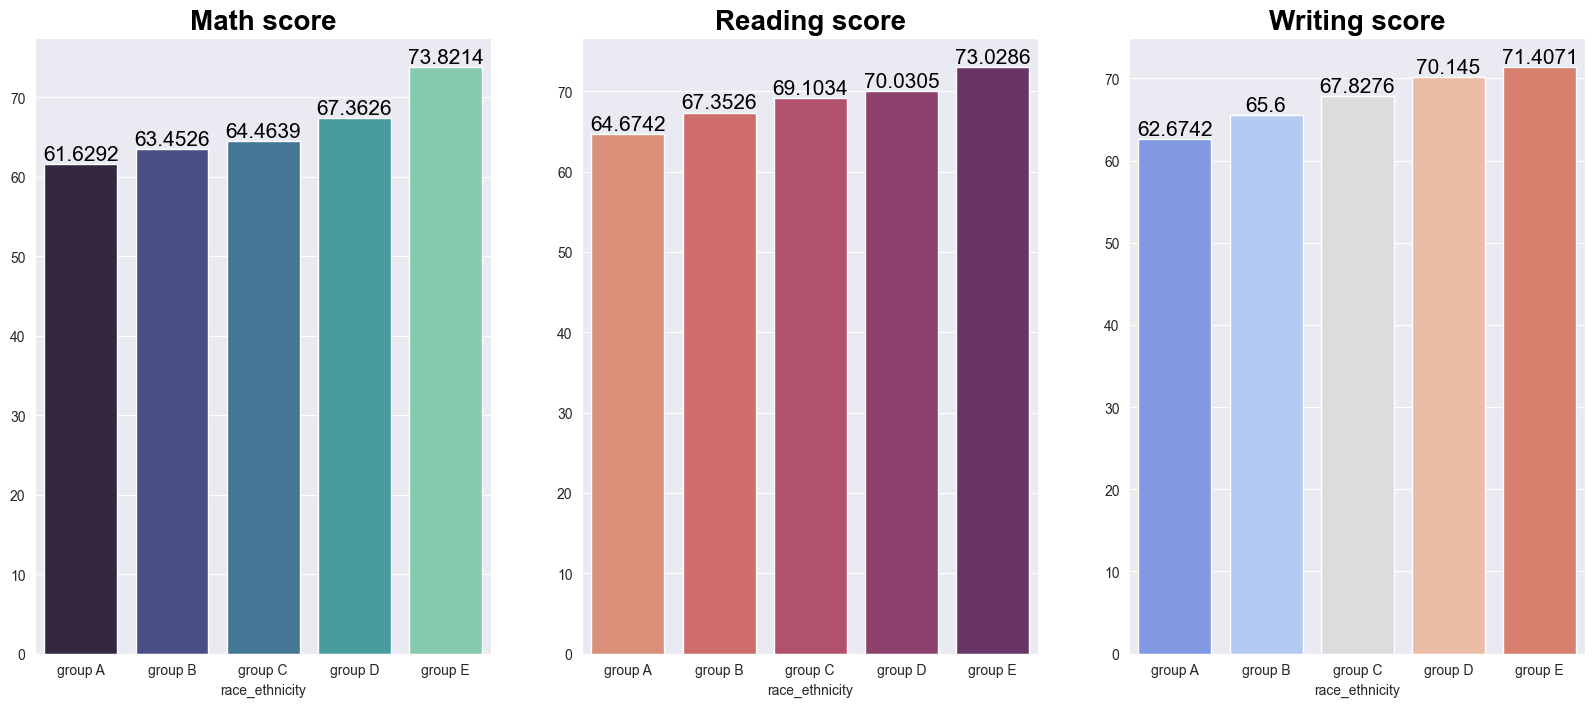

In [28]:
# Is race/ethnicity has any impact on student's performance?

Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='black',size=20,weight='bold')

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='black',size=20,weight='bold')

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='black',size=20,weight='bold')

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
    
plt.show()

**Observation:**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.


#### 3. Parental Level of Education Column:
- What is educational background of student's parent?
- Is parental education has any imapact on student's performance?

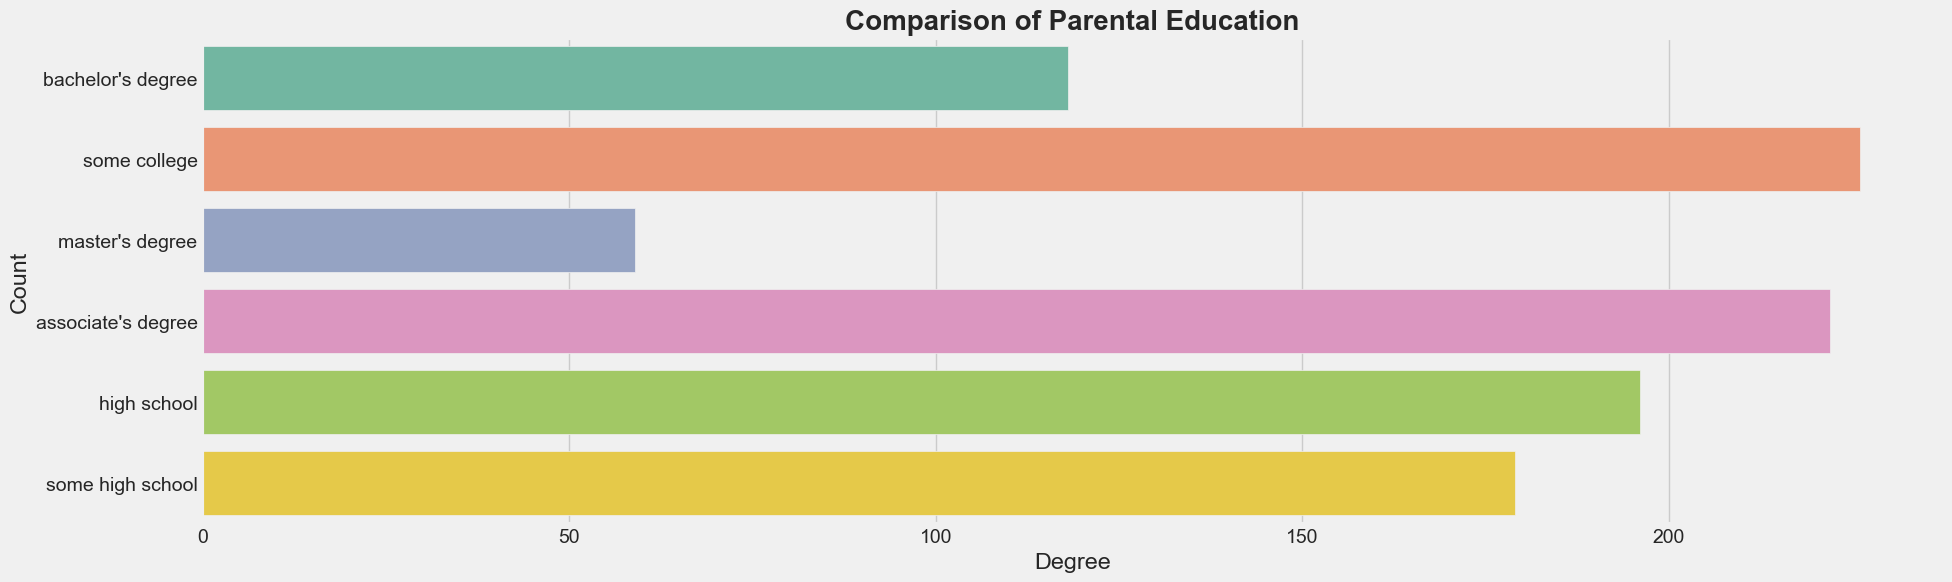

In [29]:
# What is educational background of student's parent?

plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Set2')
plt.title('Comparison of Parental Education', weight = 'bold', fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

**Observation:**
- Highest number of parents are from "Some College".

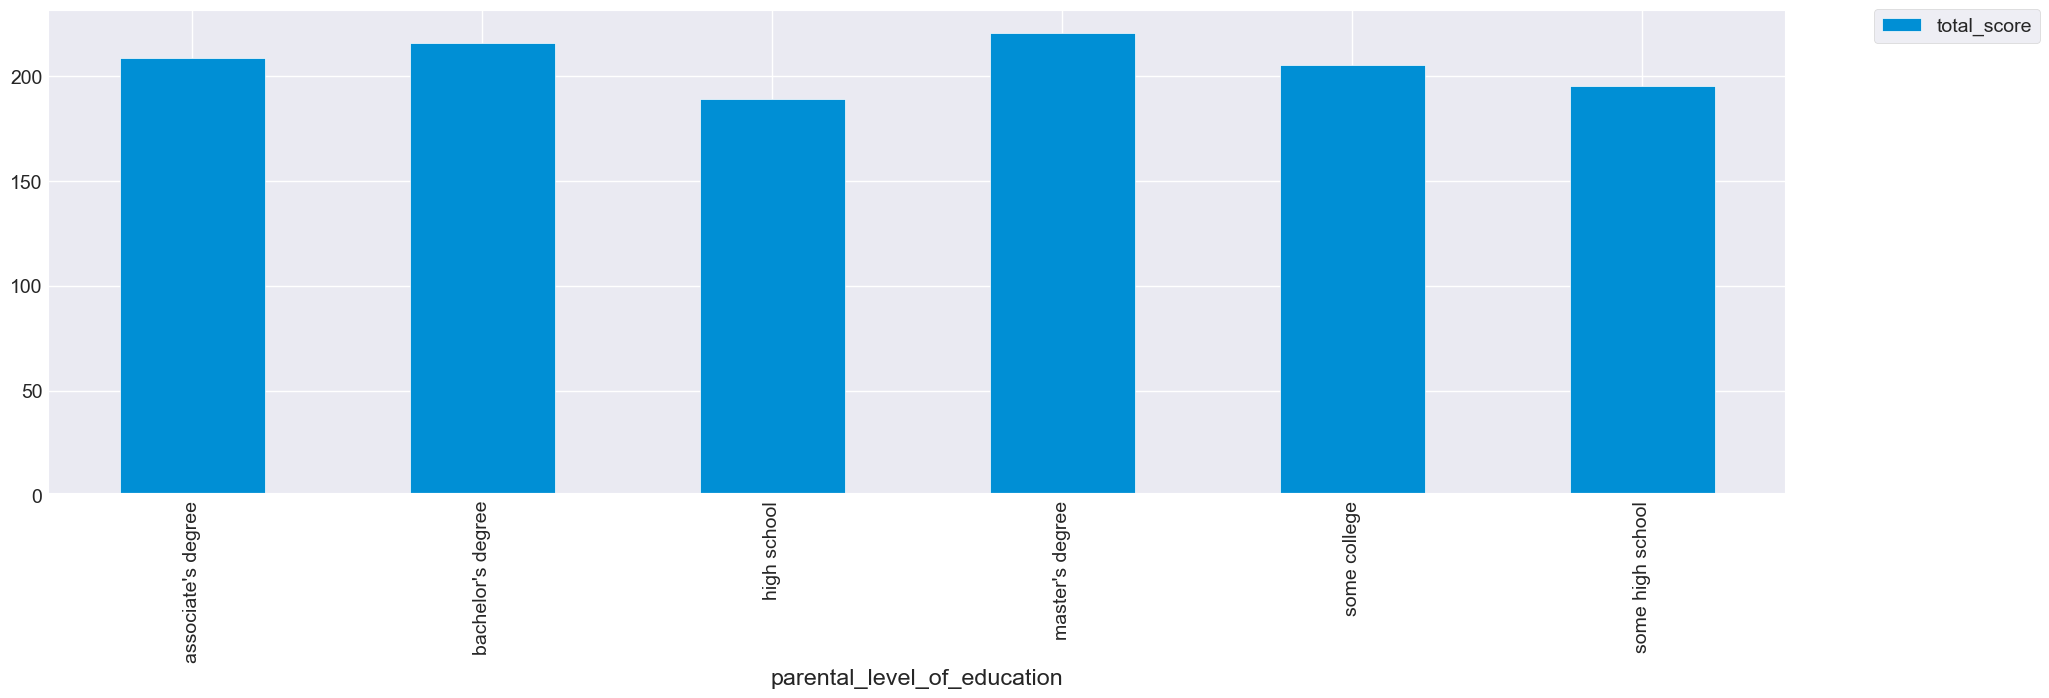

In [30]:
# Is parental education has any impact on student's performance?
sns.set_style('darkgrid')
df.groupby('parental_level_of_education')['total_score'].agg('mean').plot(kind='bar',figsize=(20,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Observation:**
- The score of students whose parents possess master's and bachelor's level of education are higher than others.


#### 4. Lunch Column:
- Which type of lunch is most common amoung students?
- What is the effect of lunch type on test result?

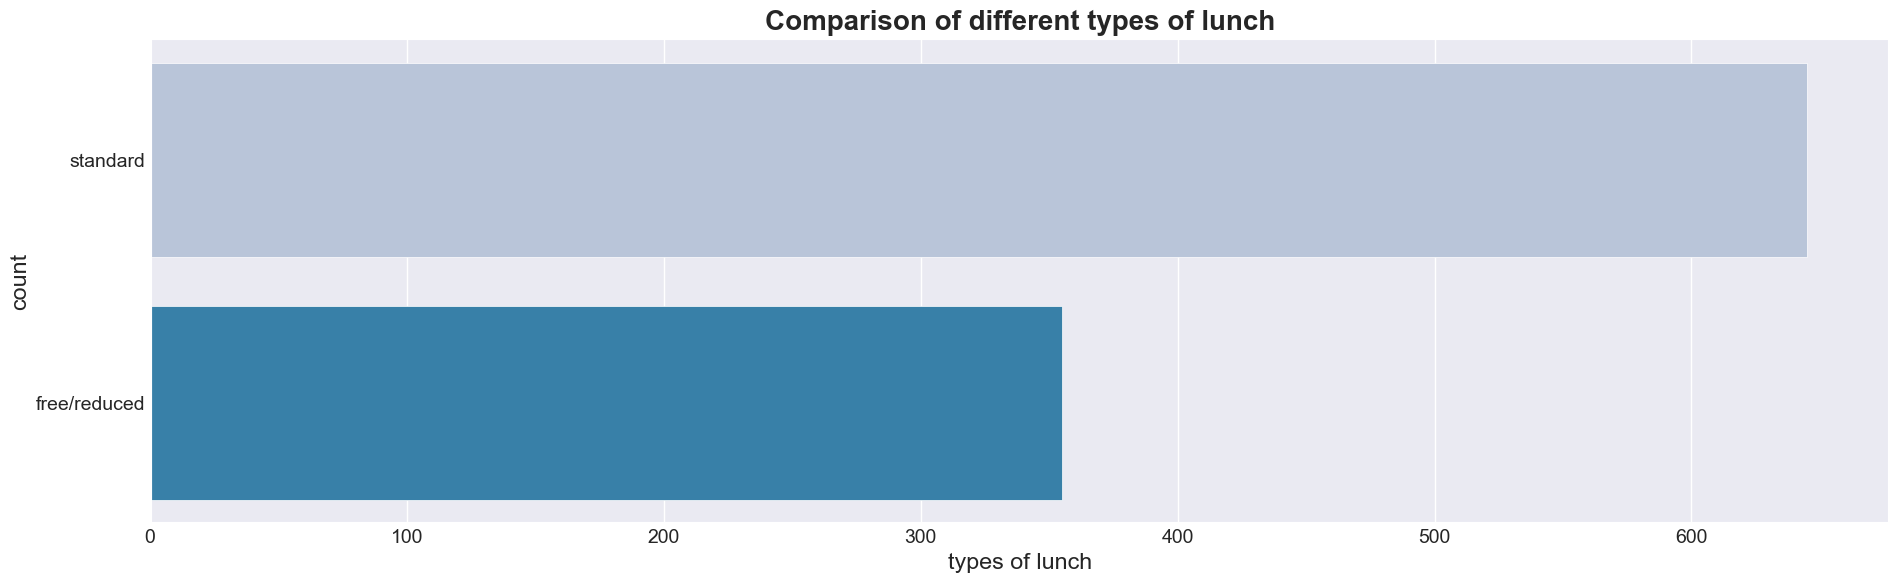

In [31]:
# Which type of lunch is most common amoung students?

plt.rcParams['figure.figsize'] = (20, 6)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 'bold', fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Observation:**
- Students being served standard lunch is more than free lunch.

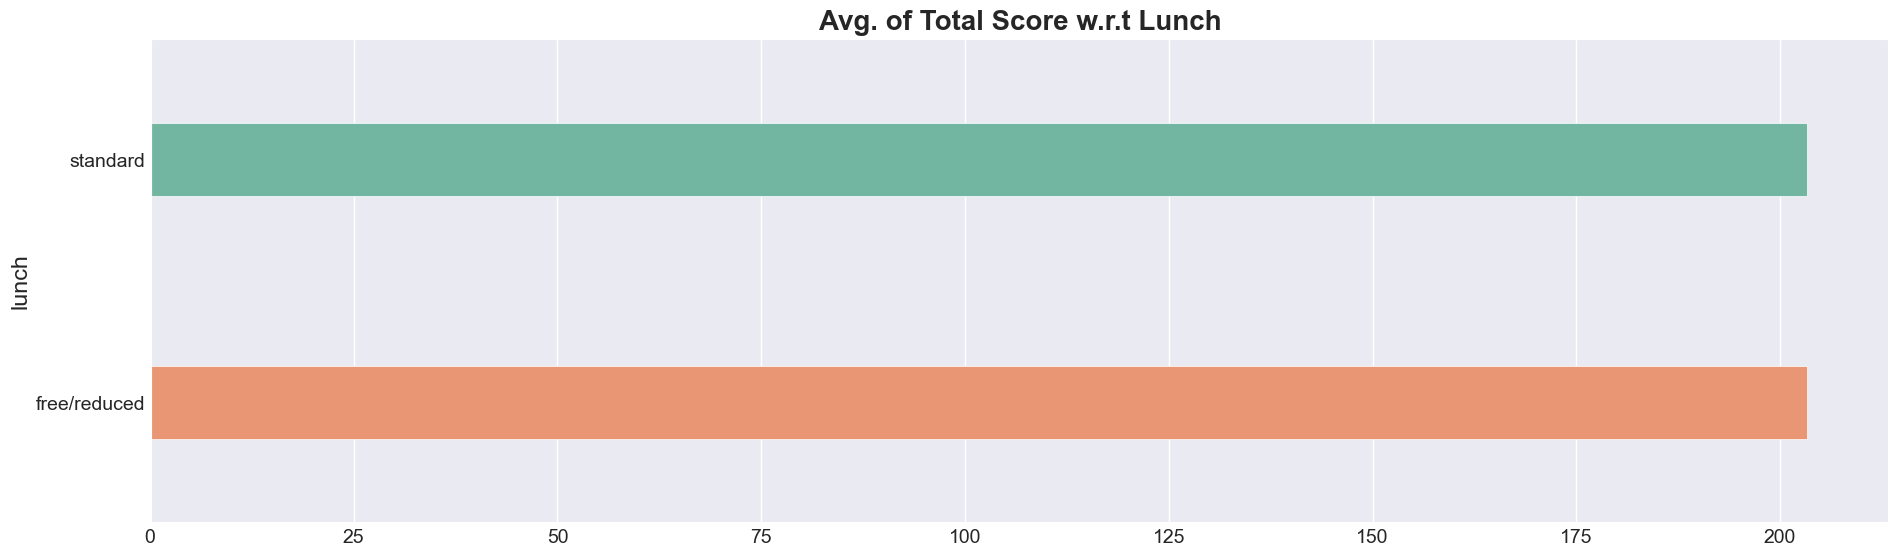

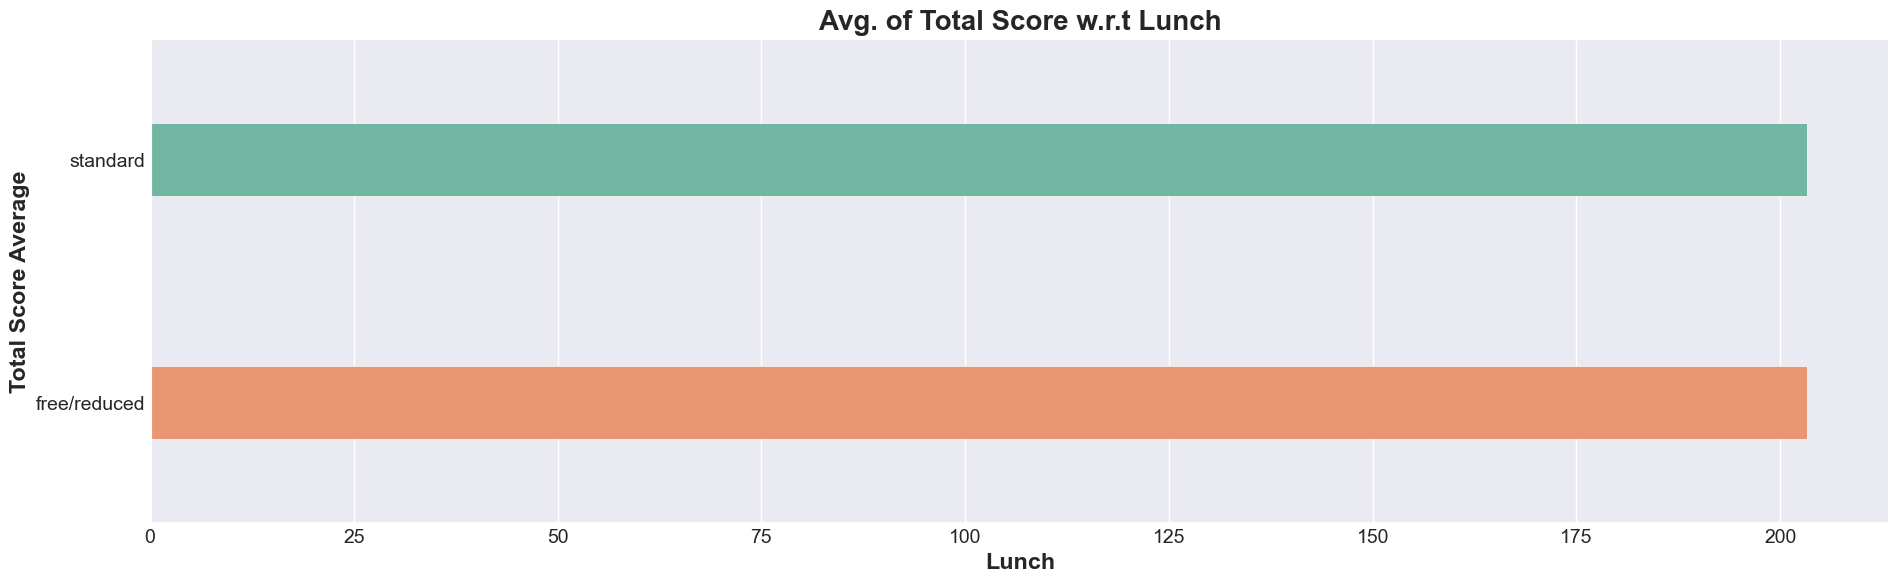

In [33]:
# Is Lunch Type intake has any impact on student's performance?

plt.figure(figsize=(20,6))
plt.title("Avg. of Total Score w.r.t Lunch",weight='bold',size=20)
sns.barplot(data=df, y=df['lunch'], x=df['total_score'].mean(), hue='lunch', palette='Set2',width=0.3)
plt.ylabel("Total Score Average",weight='bold')
plt.xlabel("Lunch",weight='bold')
plt.show()

#### 5. Test Preparation Course Column:
- Is test preparation course has any impact on student's performance?

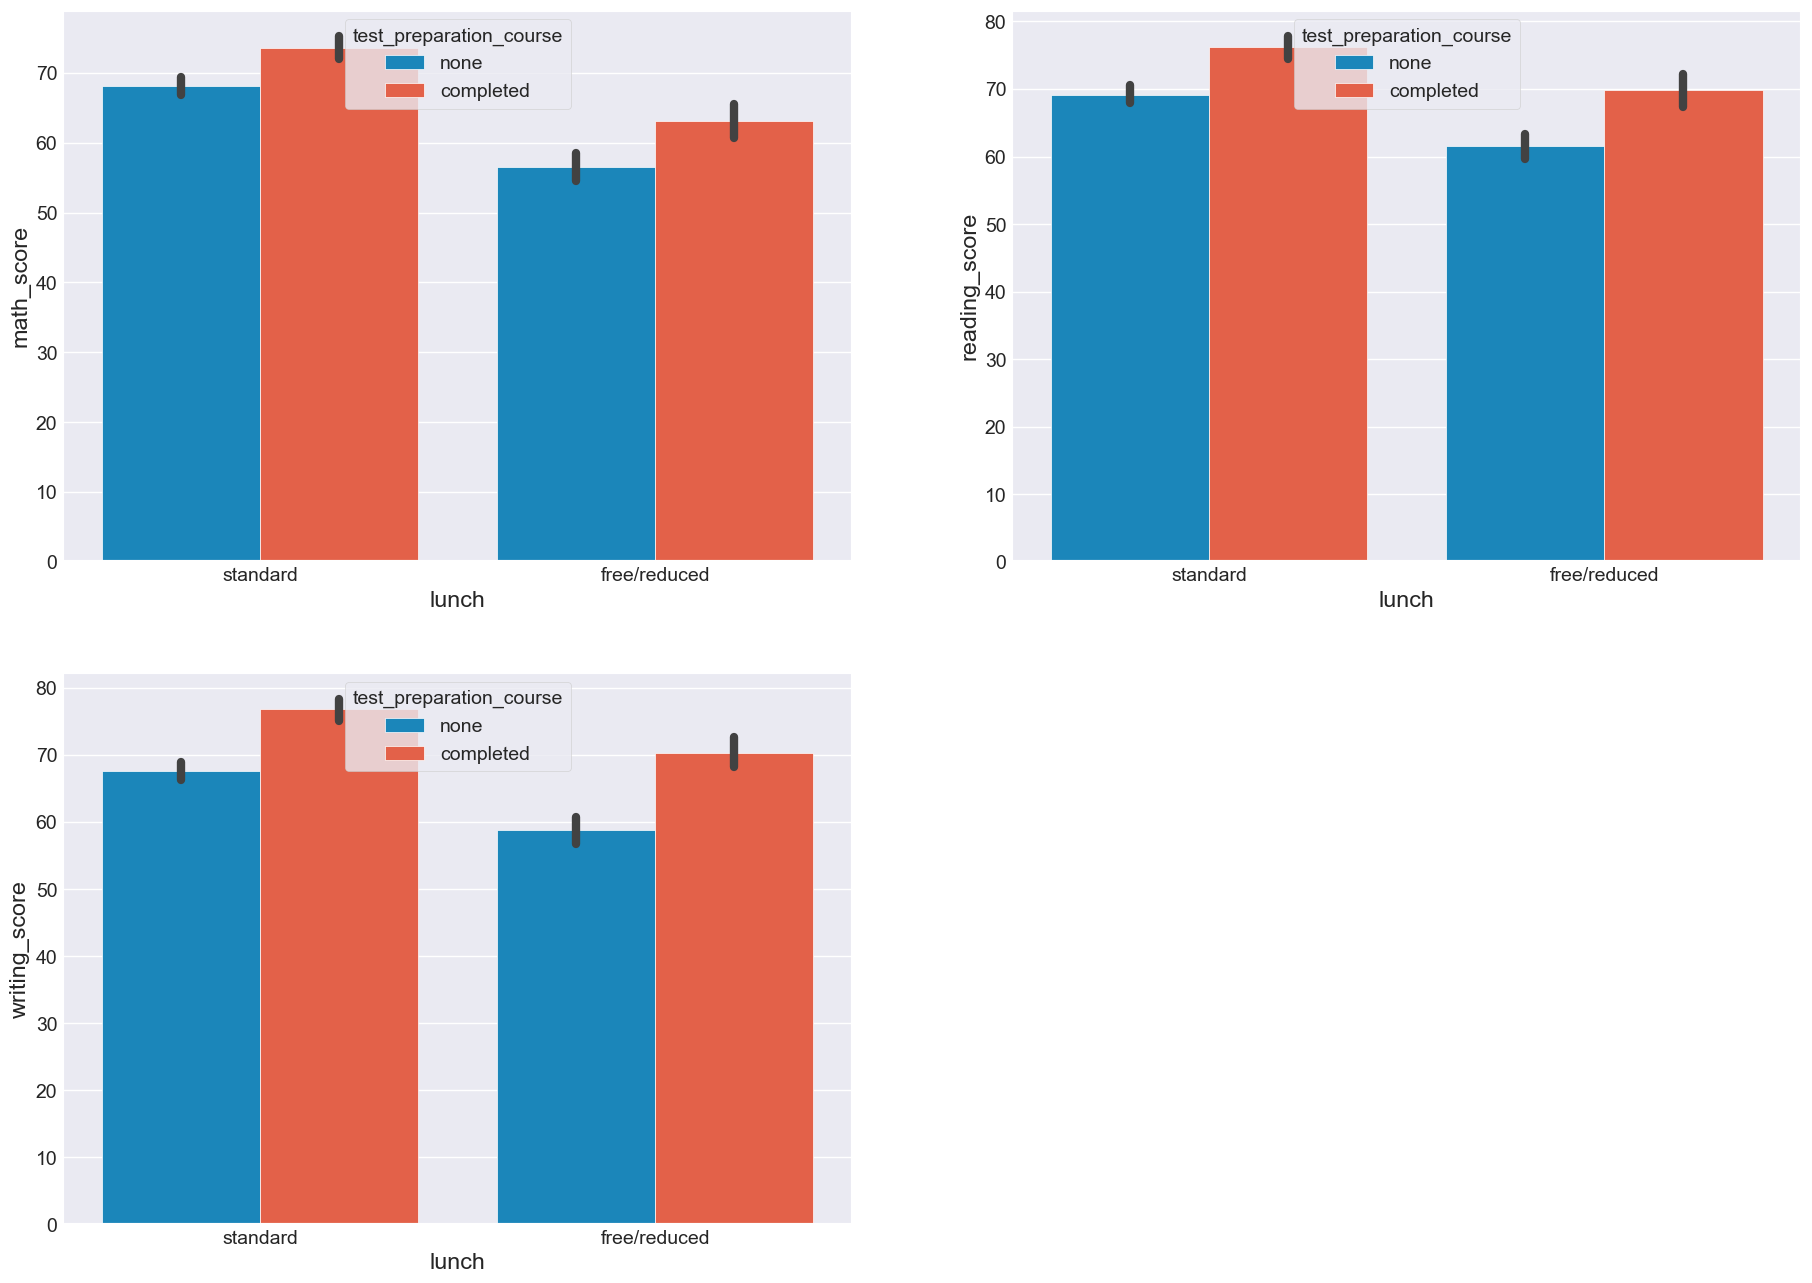

In [38]:
# Is test preparation course has any impact on student's performance?

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

**Observation:**
- Students who have completed the Test Preparation Course have scores higher in all three categories than those who haven't taken the course.

#### Checking For Outliers

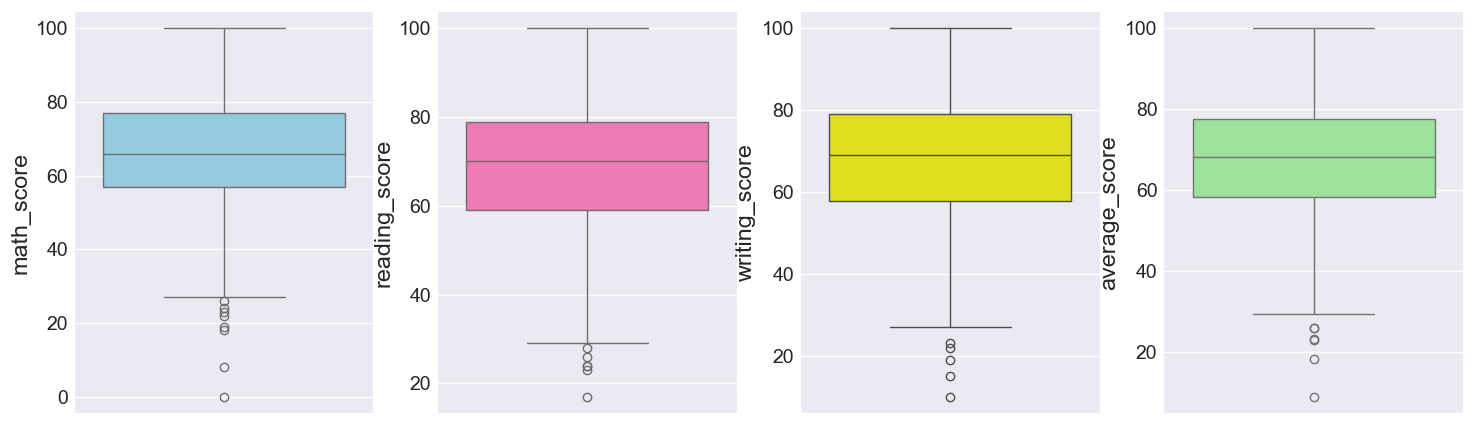

In [39]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

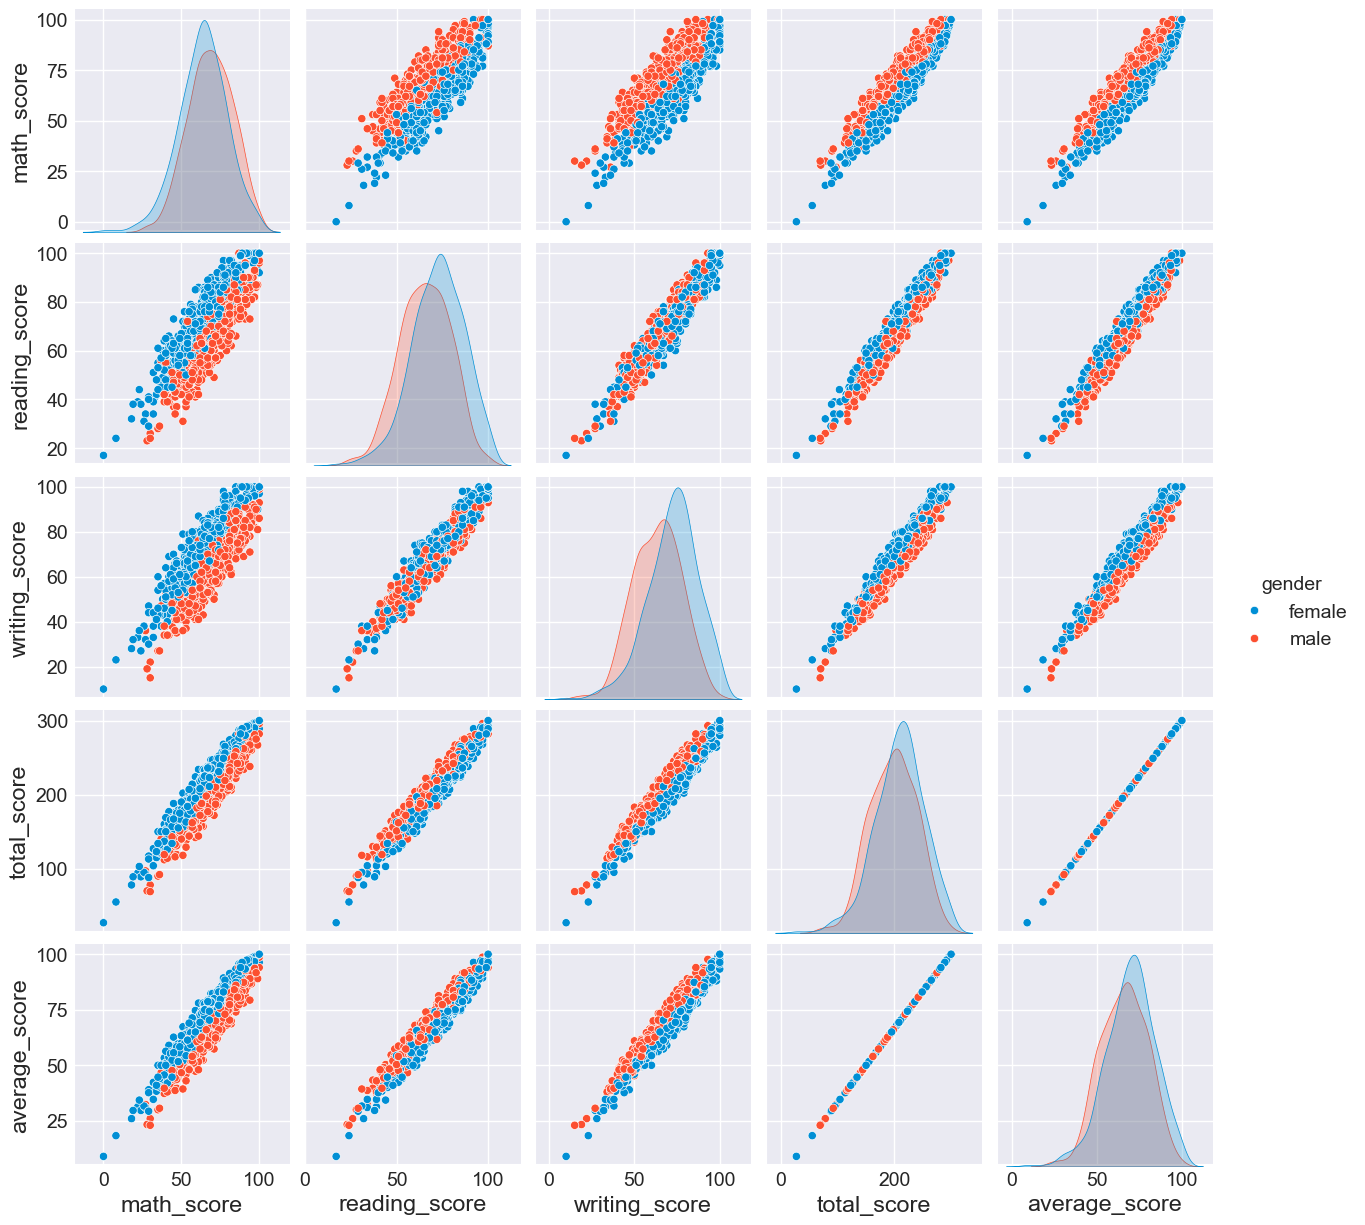

In [34]:
# Multivariate Analysis using PairPlot:

sns.pairplot(df,hue='gender')
plt.show()

**Observation:**
- From the above plot it is clear that all the scores increase linearly with each other.
---
### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.